In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('./Admission_Predict_Ver1.1.csv')

In [3]:
df.columns
features = ['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research']
predict = 'Chance of Admit '

In [4]:
x = df.loc[:,features].values
x

array([[  1.  , 337.  , 118.  , ...,   4.5 ,   9.65,   1.  ],
       [  2.  , 324.  , 107.  , ...,   4.5 ,   8.87,   1.  ],
       [  3.  , 316.  , 104.  , ...,   3.5 ,   8.  ,   1.  ],
       ...,
       [498.  , 330.  , 120.  , ...,   5.  ,   9.56,   1.  ],
       [499.  , 312.  , 103.  , ...,   5.  ,   8.43,   0.  ],
       [500.  , 327.  , 113.  , ...,   4.5 ,   9.04,   0.  ]])

In [5]:
x = StandardScaler().fit_transform(x)
x

NameError: name 'StandardScaler' is not defined

In [6]:
y = df.loc[:,'Chance of Admit '].values
y

array([0.92, 0.76, 0.72, 0.8 , 0.65, 0.9 , 0.75, 0.68, 0.5 , 0.45, 0.52,
       0.84, 0.78, 0.62, 0.61, 0.54, 0.66, 0.65, 0.63, 0.62, 0.64, 0.7 ,
       0.94, 0.95, 0.97, 0.94, 0.76, 0.44, 0.46, 0.54, 0.65, 0.74, 0.91,
       0.9 , 0.94, 0.88, 0.64, 0.58, 0.52, 0.48, 0.46, 0.49, 0.53, 0.87,
       0.91, 0.88, 0.86, 0.89, 0.82, 0.78, 0.76, 0.56, 0.78, 0.72, 0.7 ,
       0.64, 0.64, 0.46, 0.36, 0.42, 0.48, 0.47, 0.54, 0.56, 0.52, 0.55,
       0.61, 0.57, 0.68, 0.78, 0.94, 0.96, 0.93, 0.84, 0.74, 0.72, 0.74,
       0.64, 0.44, 0.46, 0.5 , 0.96, 0.92, 0.92, 0.94, 0.76, 0.72, 0.66,
       0.64, 0.74, 0.64, 0.38, 0.34, 0.44, 0.36, 0.42, 0.48, 0.86, 0.9 ,
       0.79, 0.71, 0.64, 0.62, 0.57, 0.74, 0.69, 0.87, 0.91, 0.93, 0.68,
       0.61, 0.69, 0.62, 0.72, 0.59, 0.66, 0.56, 0.45, 0.47, 0.71, 0.94,
       0.94, 0.57, 0.61, 0.57, 0.64, 0.85, 0.78, 0.84, 0.92, 0.96, 0.77,
       0.71, 0.79, 0.89, 0.82, 0.76, 0.71, 0.8 , 0.78, 0.84, 0.9 , 0.92,
       0.97, 0.8 , 0.81, 0.75, 0.83, 0.96, 0.79, 0.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(x)
print(pca.singular_values_)
pcaDf = pd.DataFrame(data=principalComponents, columns=["PC1", "PC2", "PC3"])
pcaDf

[3227.6466606   277.60962301   69.31817778]


,PC1,PC2,PC3
0,249.721720,-20.771582,-0.378761
1,248.548703,-4.331973,3.794953
2,247.463511,4.313360,3.153714
3,246.549302,-3.670797,0.421676
4,245.439798,6.663119,3.293813
...,...,...,...
495,-245.353043,-16.958811,5.415653
496,-246.257335,-25.424935,-0.530284
497,-247.297147,-20.405953,-6.242877
498,-248.547732,3.196515,1.158500


In [9]:
finalDf = pd.concat([pcaDf, df[['Chance of Admit ']]],axis = 1)
finalDf

,PC1,PC2,PC3,Chance of Admit
0,249.721720,-20.771582,-0.378761,0.92
1,248.548703,-4.331973,3.794953,0.76
2,247.463511,4.313360,3.153714,0.72
3,246.549302,-3.670797,0.421676,0.80
4,245.439798,6.663119,3.293813,0.65
...,...,...,...,...
495,-245.353043,-16.958811,5.415653,0.87
496,-246.257335,-25.424935,-0.530284,0.96
497,-247.297147,-20.405953,-6.242877,0.93
498,-248.547732,3.196515,1.158500,0.73


In [10]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


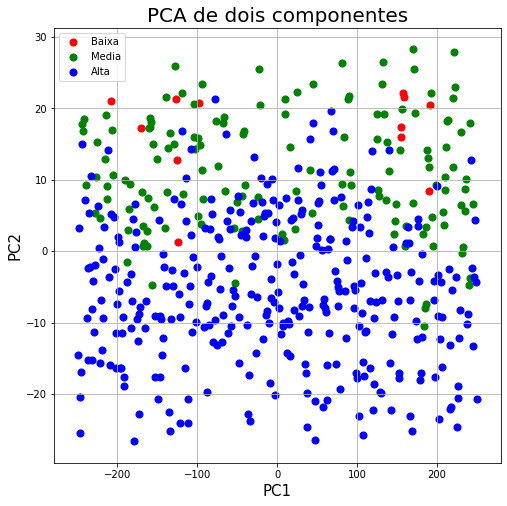

In [12]:
from matplotlib import pyplot as plt
%matplotlib inline

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('PC1', fontsize = 15)
ax.set_ylabel('PC2', fontsize = 15)
ax.set_title('PCA de dois componentes', fontsize = 20)

baixa = lambda x: x <.43
media = lambda x: x >.43 and x <.66
alta = lambda x: x >.66

targets = [baixa, media, alta]
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Chance of Admit '].apply(target)
    ax.scatter(finalDf.loc[indicesToKeep, 'PC1']
               , finalDf.loc[indicesToKeep, 'PC2']
               , c = color
               , s = 50)
ax.legend(["Baixa", "Media", "Alta"])
ax.grid()

In [56]:
finalDf = finalDf.drop('PC3', axis=1)

In [215]:
from sklearn.model_selection import train_test_split
x = finalDf.loc[:,['PC1','PC2','PC3']].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [216]:
from sklearn import svm
from sklearn import linear_model
linear_regression = linear_model.LinearRegression()
svm_model = svm.LinearSVR(max_iter=40000000, epsilon=0.11, random_state=42)
svm_model_2 = svm.SVR(kernel='rbf', )
lasso_model = linear_model.Lasso()
sgd = linear_model.SGDRegressor()

In [217]:
sgd.fit(X_train,y_train)
lasso_model.fit(X_train,y_train)
svm_model_2.fit(X_train,y_train)
svm_model.fit(X_train,y_train)

LinearSVR(C=1.0, dual=True, epsilon=0.11, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=40000000,
          random_state=42, tol=0.0001, verbose=0)

In [218]:
from sklearn.metrics import accuracy_score, mean_absolute_error
print("Linear SVR")
print(svm_model.score(X_test, y_test), mean_absolute_error(y_test,svm_model.predict(X_test)))
print("SVR")
print(svm_model_2.score(X_test, y_test))
print("Lasso")
print(lasso_model.score(X_test, y_test))
print("SGD")
print(sgd.score(X_test, y_test))

Linear SVR
0.8002773778561393 0.051840615462747076
SVR
0.7849457243393706
Lasso
-0.008547970587327258
SGD
0.8134661178030876


In [231]:
analysis_df = pd.DataFrame(svm_model.predict(X_test),columns=["Prediction"])
analysis_df["Real"] = y_test
analysis_df

,Prediction,Real
0,0.883465,0.93
1,0.767877,0.84
2,0.577476,0.39
3,0.644314,0.77
4,0.756004,0.74
...,...,...
160,0.646463,0.61
161,0.728404,0.79
162,0.667954,0.69
163,0.460802,0.54


In [205]:
x = df.loc[:,features].values
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

In [206]:
svm_model = svm.LinearSVR(max_iter=40000000, epsilon=0.1, random_state=42)
svm_model_2 = svm.SVR(kernel='rbf')
lasso_model = linear_model.Lasso()
sgd = linear_model.SGDRegressor()

In [207]:
sgd.fit(X_train,y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.01, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty='l2', power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [208]:
lasso_model.fit(X_train,y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [211]:
svm_model_2.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [210]:
svm_model.fit(X_train,y_train)

KeyboardInterrupt: 

In [ ]:
# print("Linear SVR")
# print(svm_model.score(X_test, y_test))
print("SVR")
print(svm_model_2.score(X_test, y_test))
print("Lasso")
print(lasso_model.score(X_test, y_test))
print("SGD")
print(sgd.score(X_test, y_test))

In [134]:
from sklearn import neural_network
nn = neural_network.MLPRegressor(max_iter=10000)

In [152]:
nn.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=10000,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [153]:
nn.score(X_test,y_test)

-2.1505241134361905

In [ ]:
svm_mode